# The goal
22 Sep 2024

I want to make a reasonable comparison between the periods that I found in my analysis versus periods found by other monitoring programs in NGC 1333 and IC 348.

I know of the following data sets:
1. Rebull et al 2015
2. Ghosh et al 2021
3. Wang et al 2023
4. Fritzewski et al 2016

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.table
from astropy.coordinates import SkyCoord

In [1]:
# Let's make sure we can LOAD all of the tables.
# And that we have the periods.
# And that we can plot positions.

In [92]:
def box_sequence(ramin, ramax, demin, demax):

    ra_sequence = [ramin, ramax, ramax, ramin, ramin]
    de_sequence = [demin, demin, demax, demax, demin]

    return ra_sequence, de_sequence

# for ngc 1333
bramin = 51.68
bramax = 52.73
bdemin = 30.84
bdemax = 31.73

# for ic 348
ic_coords = (55.61903099876549, 56.68231041169733, 31.76215222146832, 32.65672289502177)


In [66]:
# 1. Rebull

r1 = astropy.table.Table.read("../literature_periods/Rebull2015_aj520633t1_mrt.txt", format="ascii")

In [67]:
r1

Cat,RAdeg,DEdeg,umagCFHT,e_umagCFHT,gmagCFHT,e_gmagCFHT,rmagCFHT,e_rmagCFHT,imagCFHT,e_imagCFHT,imagSub,e_imagSub,zmagSub,e_zmagSub,l_Jmag,Jmag,e_Jmag,l_Hmag,Hmag,e_Hmag,l_Ksmag,Ksmag,e_Ksmag,l_3.6mag,3.6mag,e_3.6mag,l_4.5mag,4.5mag,e_4.5mag,l_5.8mag,5.8mag,e_5.8mag,l_8.0mag,8.0mag,e_8.0mag,l_24mag,24mag,e_24mag,l_70mag,70mag,e_70mag,logfx,e_logfx,logLx,SpType,r_SpType,Teff,Slope24,Class24,YSOlit,YSOstd,YSOx,YSOaug,CYvar,Var,VarMem,Npts-i1,Mean-i1,Median-i1,Sdev-i1,Max-i1,Min-i1,Range-i1,Amp-i1,Chisq-i1,TScale-i1,Period-i1,M-i1,Ms-i1,Q-i1,Qlt-i1,Npts-i2,Mean-i2,Median-i2,Sdev-i2,Max-i2,Min-i2,Range-i2,Amp-i2,Chisq-i2,Tscale-i2,Period-i2,M-i2,Ms-i2,Q-i2,Qlt-i2,Mean-i1i2,Sdev-i1i2,Period-i1i2,Stetson-i1i2,Cor-i1i1i2,CProb-i1i1i2,Cor-i2i1i2,CProb-i2i1i2
,deg,deg,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,dex(mW / m2),dex(mW / m2),[10-7W],,,K,,,,,,,,,,,mag,mag,mag,mag,mag,d,mag,,d,d,,,,,,mag,mag,mag,mag,mag,d,mag,,d,d,,,,,mag,mag,d,,,,,
str18,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,float64,float64,str1,float64,float64,str1,float64,float64,str1,float64,float64,str1,float64,float64,str1,float64,float64,str1,float64,float64,str1,float64,float64,str1,float64,float64,float64,float64,float64,str11,str9,int64,float64,str4,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
032831.48+312732.2,52.131169,31.458971,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,16.57,0.05,--,15.9,0.05,>,15.82,--,>,15.68,--,>,11.62,--,--,--,--,--,--,--,--,--,--,-0.51,--,0,0,0,0,0,0,0,19,16.42,16.43,0.07,16.54,16.3,13.98,0.18,0.4,--,--,-0.36,-0.32,--,--,19,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
032832.18+312820.9,52.134122,31.472489,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,16.43,0.04,--,16.11,0.06,--,15.21,0.17,>,17.79,--,>,11.41,--,--,--,--,--,--,--,--,--,--,-0.66,--,0,0,0,0,0,0,0,34,16.36,16.34,0.09,16.53,16.2,24.49,0.24,0.79,2.99,--,0.16,-0.02,1.64,2.02,34,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
032832.28+312645.4,52.134534,31.44597,--,--,--,--,--,--,--,--,--,--,--,--,--,17.66,0.11,--,16.87,0.16,--,16.5,0.15,--,16.16,0.04,--,15.96,0.06,>,17.44,--,>,15.65,--,>,12.21,--,--,--,--,--,--,--,--,--,--,-2.1,--,0,0,0,0,0,0,0,22,16.18,16.21,0.11,16.32,15.77,11.57,0.17,3.04,4.16,--,-0.96,-0.52,0.86,0.86,22,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
032832.32+312707.9,52.134707,31.452215,--,--,--,--,--,--,--,--,--,--,--,--,--,12.8,0.02,--,11.88,0.03,--,11.52,0.02,--,11.3,0.01,--,11.31,0.01,--,11.26,0.01,--,11.27,0.01,>,10.55,--,--,--,--,--,--,--,--,--,--,-2.63,--,0,0,0,0,0,0,0,34,11.34,11.34,0.01,11.38,11.3,16.22,0.02,1.76,11.1,--,0.23,-0.04,0.89,0.79,34,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
032832.37+312723.5,52.134881,31.456535,--,--,--,--,22.46,0.1,21.23,0.01,21.06,0.01,20.31,0.02,--,18.45,0.22,--,16.84,0.15,--,16.25,0.12,--,15.72,0.03,--,15.39,0.04,--,15.27,0.32,>,16.24,--,--,--,--,--,--,--,--,--,--,--,--,--,-1.83,--,0,0,0,0,0,0,0,41,15.71,15.71,0.07,15.83,15.57,19.12,0.16,1.63,8.18,--,-0.23,-0.29,0.97,0.93,41,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
032832.42+312556.6,52.135088,31.432396,--,--,--,--,--,--,--,--,--,--,--,--,--,17.11,0.07,--,15.91,0.07,--,15.37,0.06,--,14.95,0.01,--,14.84,0.02,--,14.48,0.09,--,14.38,0.32,>,12.5,--,--,--,--,--,--,--,--,--,--,-2.08,--,0,0,0,0,0,0,0,11,14.93,14.93,0.05,15.03,14.87,4.79,0.08,1.98,--,--,-0.07,-0.02,--,--,11,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
...,...,...,...,...,...,...,...,...

In [80]:
# r1_per = np.isfinite(r1['Period-i1']) | np.isfinite(r1['Period-i2']) | np.isfinite(r1['Period-i1i2'])
r1_per = ~r1['Period-i1'].mask | ~r1['Period-i2'].mask | ~r1['Period-i1i2'].mask

In [82]:
np.sum(r1_per)

24

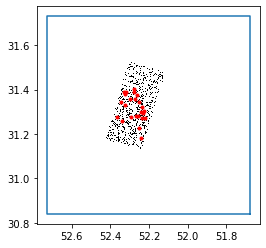

In [83]:
r1_ra_deg = r1['RAdeg']
r1_de_deg = r1['DEdeg']
plt.figure(figsize=(4,4))
plt.plot(*box_sequence(bramin, bramax, bdemin, bdemax))

plt.plot(r1_ra_deg, r1_de_deg, 'k,')
plt.plot(r1_ra_deg[r1_per], r1_de_deg[r1_per], 'r.')
plt.gca().invert_xaxis()

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([5.51 , 5.938, 6.366, 6.794, 7.222, 7.65 , 8.078, 8.506, 8.934,
        9.362, 9.79 ]),
 <BarContainer object of 10 artists>)

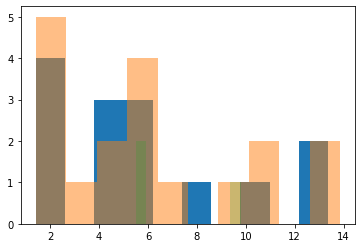

In [13]:
plt.hist(r1['Period-i1'])
plt.hist(r1['Period-i2'], alpha=0.5)
plt.hist(r1['Period-i1i2'], alpha=0.25)

In [163]:
stacked_periods = np.nanmean(np.ma.stack([ r1['Period-i1'], r1['Period-i2'], r1['Period-i1i2']]), axis=0)

In [148]:
len(np.nanmean( np.array([ r1['Period-i1'], r1['Period-i2'], r1['Period-i1i2']]), axis=0)), len(r1['Period-i1'])

(701, 701)

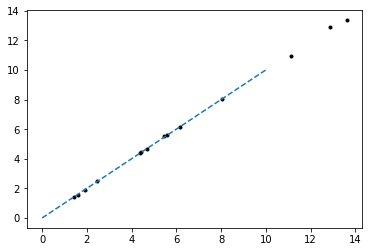

In [164]:
# plt.plot(np.nanmean( np.array([ r1['Period-i1'], r1['Period-i2'], r1['Period-i1i2']]), axis=0), r1['Period-i1'], 'k.')
plt.plot(stacked_periods, r1['Period-i1'], 'k.')
plt.plot([0,10], [0,10], '--')

In [146]:
[print(np.nanmean([x, y, z]), (x, y, z)) for x, y, z in zip(r1['Period-i1'][r1_per], r1['Period-i2'][r1_per], r1['Period-i1i2'][r1_per])]

1.915 (1.92, 1.91, masked)
11.3 (masked, 11.3, masked)
1.41 (1.41, 1.41, masked)
13.61 (13.36, 13.86, masked)
4.44 (4.44, masked, masked)
6.16 (6.16, masked, masked)
5.96 (masked, 5.96, masked)
3.23 (masked, 3.23, masked)
1.56 (masked, 1.56, masked)
8.06 (8.06, masked, masked)
7.12 (masked, 7.12, masked)
12.89 (12.89, 12.89, masked)
5.77 (masked, 5.77, masked)
4.365 (4.39, 4.34, masked)
2.47 (2.47, masked, masked)
5.68 (masked, masked, 5.68)
4.67 (4.67, 4.67, masked)
5.596666666666667 (5.6, 5.68, 5.51)
5.47 (5.51, 5.43, masked)
1.59 (1.58, 1.6, masked)
9.79 (masked, masked, 9.79)
9.53 (masked, 9.53, masked)
11.13 (10.96, 11.3, masked)
2.42 (masked, 2.42, masked)


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

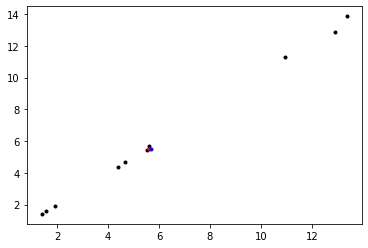

In [129]:
plt.plot(r1['Period-i1'], r1['Period-i2'], 'k.')
plt.plot(r1['Period-i1'], r1['Period-i1i2'], 'r.')
plt.plot(r1['Period-i2'], r1['Period-i1i2'], 'b.')

In [ ]:
# 2. Ghosh

In [4]:
g1 = astropy.table.Table.read("../literature_periods/Ghosh21_Fast photometric variability of very low mass stars in IC 348_ detection of superflare in an M dwarf _ Oxford Academic.html", format='ascii.html')

In [84]:
g1

Star .,LRL .,Identifier .,RA .,Dec. .,"Tempb, c, h .",J (maga) .,"I(magb, e, i) .",SpTb .,Period .,Period (h) .,Rms .
int64,int64,str24,str11,str12,str4,str7,float64,str6,str5,str5,float64
1,1679,2MASS J03445205+3158252,03 44 52.05,+31 58 25.2,3342,13.796,16.86,M3.5f,–,3.52,0.091
3,1881,2MASS J03443379+3158302,03:44:33.64,+31:58:29.1,3270,13.488,16.04,M3.75f,3.9c,5.72,0.026
4,--,[AMB2013] CFHT-IC 348 17,03:44:49.43,+31:58:44.3,–,15.598g,17.91,–,–,–,0.041
9,363,2MASS J03441726+3200152,03:44:17.27,+32:00:15.4,2600,14.92,17.95,M8,–,–,0.058
12,205,2MASS J03442980+3200545,03:44:29.80,+32:00:54.6,2840,13.668,16.66,M6j,--,10.92,0.014
25,140,2MASS J03443568+3203035,03 44 35.68,+32 03 03.5,3380,14.128,17.36,M3.25,12c,–,0.07
29,300,2MASS J03443896+3203196,03 44 38.98,+32 03 19.8,2990,14.127,17.24,M5,–,10.26,0.016
...,...,...,...,...,...,...,...,...,...,...,...
172,116,2MASS J03442155+3210174,03 44 21.56,+32 10 17.4,3632,12.620,15.28,M1.5,7.0c,–,0.058


In [97]:
g1_ra_str = g1['RA\n            .']
g1_de_str = g1['Dec.\n            .']

g1_c = SkyCoord(ra=g1_ra_str, dec=g1_de_str,  unit=(u.hourangle, u.deg))

In [98]:
g1_c

<SkyCoord (ICRS): (ra, dec) in deg
    [(56.216875  , 31.97366667), (56.14016667, 31.97475   ),
     (56.20595833, 31.97897222), (56.07195833, 32.00427778),
     (56.12416667, 32.01516667), (56.14866667, 32.05097222),
     (56.16241667, 32.0555    ), (56.134875  , 32.05761111),
     (56.08775   , 32.10447222), (56.141875  , 32.11580556),
     (56.12129167, 32.13083333), (56.18575   , 32.13680556),
     (56.16333333, 32.13711111), (56.06491667, 32.15605556),
     (56.07583333, 32.16647222), (56.08983333, 32.1715    ),
     (56.18233333, 32.17511111), (56.09004167, 32.17713889),
     (56.07741667, 32.21475   ), (55.98495833, 32.16641667),
     (56.14975   , 32.18819444), (56.16633333, 32.103575  )]>

In [38]:
g1.colnames

['Star\n            .',
 'LRL\n            .',
 'Identifier\n            .',
 'RA\n            .',
 'Dec.\n            .',
 'Tempb, c, h\n            .',
 'J (maga)\n            .',
 'I(magb, e, i)\n            .',
 'SpTb\n            .',
 'Period\n            .',
 'Period (h)\n            .',
 'Rms\n            .']

In [46]:
[type(x) for x in g1['Period\n            .']]

[numpy.str_,
 numpy.str_,
 numpy.str_,
 numpy.str_,
 numpy.ma.core.MaskedConstant,
 numpy.str_,
 numpy.str_,
 numpy.str_,
 numpy.str_,
 numpy.str_,
 numpy.str_,
 numpy.str_,
 numpy.str_,
 numpy.str_,
 numpy.str_,
 numpy.str_,
 numpy.str_,
 numpy.str_,
 numpy.str_,
 numpy.str_,
 numpy.str_,
 numpy.str_]

In [189]:
# per_str = [(x[:-1]) for x in g1['Period\n            .'] if type(x)==np.str_]
per_str = [(x[:-1]) if type(x)==np.str_ else '' for x in g1['Period\n            .']]
per_str2 = ['nan' if x=='' else x for x in per_str]
per = [float(x) for x in per_str if len(x) > 1]

g1_is_per = (g1['Period\n            .'] != '–') | (g1['Period (h)\n            .'] != '–')

In [179]:
# per_hr = [float(x) for x in g1['Period (h)\n            .'] if x != '–']
# per_str = [(x[:-1]) if type(x)==np.str_ else '' for x in g1['Period\n            .']]
per_hr = [float(x) if x != '–' else np.nan for x in g1['Period (h)\n            .']]


In [194]:
np.array(per_str2).astype(float)

array([ nan,  3.9,  nan,  nan,  nan, 12. ,  nan,  1.6,  nan,  3.4,  nan,
        nan,  nan,  0.6,  2.7,  7. , 10.6,  2.8,  nan,  nan,  nan,  nan])

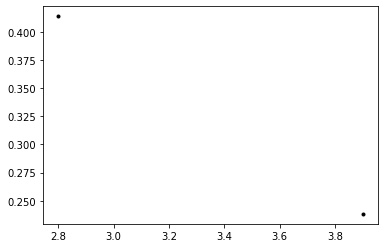

In [193]:
# per_str, per_hr

plt.plot(np.array(per_str2).astype(float), np.array(per_hr)/24, 'k.')
# plt.plot([0,10], [0,10], '--')

In [207]:
g1_periods = np.nanmax([np.array(per_str2).astype(float), np.array(per_hr)/24] , axis=0)
g1_periods

/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: All-NaN axis encountered
  """Entry point for launching an IPython kernel.


array([ 0.14666667,  3.9       ,         nan,         nan,  0.455     ,
       12.        ,  0.4275    ,  1.6       ,  0.46208333,  3.4       ,
        0.33333333,  0.39333333,         nan,  0.6       ,  2.7       ,
        7.        , 10.6       ,  2.8       ,         nan,  0.17666667,
               nan,  0.35958333])

In [203]:
print("P (d)  P (d)  P (hr)")
print("--------------------")
for (x, y, z) in zip(np.array(per_str2).astype(float), np.array(per_hr)/24, per_hr):
    print(f"{x:5.2f}, {y:5.2f}, {z:5.2f}")

P (d)  P (d)  P (hr)
--------------------
  nan,  0.15,  3.52
 3.90,  0.24,  5.72
  nan,   nan,   nan
  nan,   nan,   nan
  nan,  0.46, 10.92
12.00,   nan,   nan
  nan,  0.43, 10.26
 1.60,   nan,   nan
  nan,  0.46, 11.09
 3.40,   nan,   nan
  nan,  0.33,  8.00
  nan,  0.39,  9.44
  nan,   nan,   nan
 0.60,   nan,   nan
 2.70,   nan,   nan
 7.00,   nan,   nan
10.60,   nan,   nan
 2.80,  0.41,  9.93
  nan,   nan,   nan
  nan,  0.18,  4.24
  nan,   nan,   nan
  nan,  0.36,  8.63


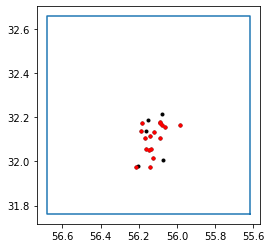

In [101]:
# map for g1

# r1_ra_deg = r1['RAdeg']
# r1_de_deg = r1['DEdeg']
plt.figure(figsize=(4,4))
# plt.plot(*box_sequence(bramin, bramax, bdemin, bdemax))
plt.plot(*box_sequence(*ic_coords))


plt.plot(g1_c.ra, g1_c.dec, 'k.')
plt.plot(g1_c.ra[g1_is_per], g1_c.dec[g1_is_per], 'r.')
# plt.plot(r1_ra_deg[r1_per], r1_de_deg[r1_per], 'r.')
plt.gca().invert_xaxis()

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

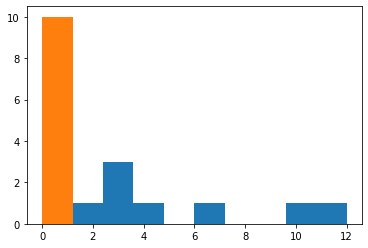

In [63]:
plt.hist(per, range=[0, 12])
plt.hist(np.array(per_hr) / 24, range=[0, 12])


[3.52, 5.72, 10.92, 10.26, 11.09, 8.0, 9.44, 9.93, 4.24, 8.63]


In [ ]:
plt.hist(g1[])

In [ ]:
# 3. Wang.

In [108]:
w1 = astropy.table.Table.read("../literature_periods/Wang2023_raaacd58bt3_ascii.txt", format='ascii', delimiter='\t', header_start=2, data_start=4, data_end=238)

In [109]:
w1

Identifier,R.A.,Decl.,SPT,Disk ^a,CTTS ^b,$\left\langle r\right\rangle $,nu,Amplitude,Timescale,Q,M,Category,Angle
str28,float64,float64,str4,str1,str5,float64,float64,float64,float64,float64,float64,str6,str5
Gaia EDR3 124009935063344128,51.245429,31.010398,M3.1,N,N,16.12,0.0078,0.19,50.36,0.81,0.08,QPS,68.7
Gaia EDR3 123994679339516800,51.281136,30.828328,M2.8,N,N,16.59,0.0065,0.18,3.18,0.85,-0.04,QPS,41.0
2MASS J03250943+3046215,51.289291,30.772661,K9.3,Y,Y,18.12,0.0299,0.96,8.31,0.92,-0.16,S,62.1
Gaia EDR3 123998252752298752,51.302425,30.989481,K9.5,Y,Y,13.29,0.025,0.31,11.9,0.88,-0.09,S,50.9
Gaia EDR3 123996874066752640,51.379737,30.918846,M5.2,N,N,17.62,0.009,0.33,34.59,0.65,-0.24,QPS,44.9
2MASS J03253315+3055443,51.388165,30.928993,M0.9,Y,Y,15.74,0.0701,1.61,4.78,0.72,0.14,QPS,68.2
Gaia EDR3 124018318839496064,51.407963,31.139139,M0.2,Y,Y,15.61,0.0576,1.1,0.86,0.93,0.45,APD,78.0
Gaia EDR3 123999936379477504,51.445275,30.955693,M4.6,Y,Y,16.83,0.0353,0.86,121.39,0.85,0.4,L,71.9
2MASS J03254886+3057258,51.45359,30.957169,K4.5,Y,cdots,14.58,0.0516,1.03,143.26,0.93,0.53,L,34.2


In [111]:
w1['R.A.'].astype(float)


51.245429
51.281136
51.289291
51.302425
51.379737
51.388165
51.407963
51.445275
51.45359
51.469818
51.582532


In [118]:
w1_p = (w1['Category'] == 'P') | (w1['Category'] == 'P ^c')

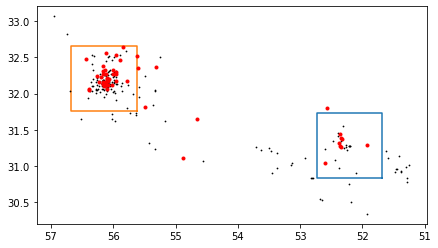

In [119]:
w1_ra_deg = w1['R.A.'].astype(float)
w1_de_deg = w1['Decl.'].astype(float)
plt.figure(figsize=(7,4))
plt.plot(*box_sequence(bramin, bramax, bdemin, bdemax))
plt.plot(*box_sequence(*ic_coords))

plt.plot(w1_ra_deg, w1_de_deg, 'k.', ms=1.5)
plt.plot(w1_ra_deg[w1_p], w1_de_deg[w1_p], 'r.')
# plt.plot(r1_ra_deg[r1_per], r1_de_deg[r1_per], 'r.')

# plt.plot(r1_ra_deg, r1_de_deg, 'k,')
# plt.plot(r1_ra_deg[r1_per], r1_de_deg[r1_per], 'r.')
plt.gca().invert_xaxis()

In [33]:
set(w1['Category'])

{'APD',
 'B',
 'B ^c',
 'EYE',
 'L',
 'L ^c',
 'MP',
 'P',
 'P ^c',
 'QPD',
 'QPD ^c',
 'QPS',
 'QPS ^c',
 'S',
 'U'}

(array([14.,  5., 10.,  7.,  7.,  5.,  1.,  1.,  0.,  3.]),
 array([ 0.71 ,  2.356,  4.002,  5.648,  7.294,  8.94 , 10.586, 12.232,
        13.878, 15.524, 17.17 ]),
 <BarContainer object of 10 artists>)

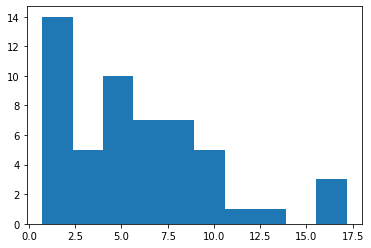

In [36]:
plt.hist(s[w1_p])

In [6]:
#4.  Fritzy 2016

In [22]:
f1 = astropy.table.Table.read(
    "../literature_periods/Fritzewski16_Long-term photometry of IC 348 with the Young Exoplanet Transit Initiative network _ Oxford Academic.html", 
    format='ascii.html')

In [120]:
f1.colnames

['ID\n            .',
 'RA\n            .',
 'Dec.\n            .',
 'Identifier\n            .',
 'CB\n            .',
 'LRL\n            .',
 'P\n            .',
 'ΔP\n            .',
 'PCB\n            .',
 'Amplitude\n            .',
 'R\n            .',
 '(V\xa0−\xa0R)\n            .']

In [122]:
f1_ra_deg = f1[ 'RA\n            .',]
f1_de_deg = f1[ 'Dec.\n            .',]

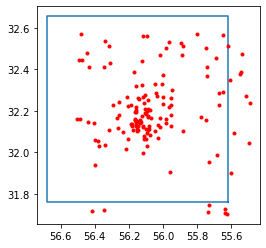

In [127]:
plt.figure(figsize=(4,4))
# plt.plot(*box_sequence(bramin, bramax, bdemin, bdemax))
plt.plot(*box_sequence(*ic_coords))

plt.plot(f1_ra_deg, f1_de_deg, 'r.')
# plt.plot(w1_ra_deg[w1_p], w1_de_deg[w1_p], 'r.')
# plt.plot(r1_ra_deg[r1_per], r1_de_deg[r1_per], 'r.')

# plt.plot(r1_ra_deg, r1_de_deg, 'k,')
# plt.plot(r1_ra_deg[r1_per], r1_de_deg[r1_per], 'r.')
plt.gca().invert_xaxis()

In [23]:
f1

ID .,RA .,Dec. .,Identifier .,CB .,LRL .,P .,ΔP .,PCB .,Amplitude .,R .,(V − R) .
int64,float64,float64,str24,int64,str6,float64,float64,float64,float64,float64,float64
25,56.1632,32.1552,2MASS J03443916+3209182,109,9,1.64,0.02,1.6,0.094,13.3,1.4
27,56.1539,32.1127,2MASS J03443694+3206453,95,6,1.69,0.02,1.7,0.072,11.7,1.1
30,55.9635,32.2193,2MASS J03435123+3213091,--,22,0.788,0.003,--,0.12,11.9,0.9
31,55.8851,32.5134,2MASS J03433241+3230477,--,--,0.78,0.01,--,0.019,11.9,1.4
36,56.1,32.1834,2MASS J03442398+3211000,--,38,0.71,0.01,--,0.027,12.4,0.9
38,55.7496,32.1541,2MASS J03425992+3209144,--,--,45.5,0.5,--,0.21,12.5,2.4
49,55.5409,32.3859,2MASS J03420982+3223086,--,--,39.1,0.4,--,0.16,12.8,1.6
...,...,...,...,...,...,...,...,...,...,...,...
972,56.1083,32.275,2MASS J03442595+3216306,--,(972),7.56,0.08,--,0.032,14.2,0.8


(array([27., 27., 20., 19., 16., 12.,  6.,  4.,  3.,  1.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

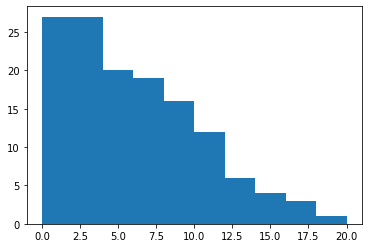

In [32]:
plt.hist(f1["P\n            ."], range=[0,20])

In [126]:
[print(x) for x in f1["P\n            ."]]

1.64
1.69
0.788
0.78
0.71
45.5
39.1
0.1132
4.13
0.84
3.01
4.91
32.7
15.3
11.51
2.26
21.5
1.88
5.48
28.1
7.89
2.24
7.01
5.21
11.0
1.26
5.49
2.14
12.15
16.4
8.37
11.91
21.0
8.93
2.18
11.5
6.28
4.04
4.04
0.28
29.9
0.434
3.34
39.1
6.11
28.5
8.69
4.39
14.04
3.75
0.766
10.5
8.23
1.15
2.67
6.55
0.6508
9.5
7.69
9.7
13.5
3.91
9.68
0.705
7.56
5.06
26.9
6.96
0.83
12.1
3.09
2.47
10.0
1.67
4.86
6.14
25.7
7.09
6.4
12.1
11.9
8.62
2.84
8.17
3.31
9.28
4.03
4.94
6.9
8.14
10.9
7.59
17.1
17.3
4.34
2.88
7.25
7.55
1.57
220.0
3.26
8.67
12.2
0.47375
7.7
0.78
3.34
0.579
4.95
5.07
2.61
11.7
2.39
5.58
2.39
0.4882
4.4
10.33
20.0
10.69
4.85
2.34
2.46
3.25
14.4
7.72
0.638
6.96
8.62
4.6
5.28
1.82
2.22
2.62
2.41
2.79
8.34
3.98
15.8
8.36
44.7
7.56
9.58
0.422
0.446
1.59
12.13
11.88


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [137]:
from wuvars.analysis.load_periodics_v4 import (ic_periods, ngc_periods,
                                               select_periodic_variables_v4)


/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/load_periodics_v4.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _periods['Period'][i] = row[per_col]
/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/load_periodics_v4.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _periods["Amp"][i] = row[amp_col]


In [138]:
ic_periods

,index,SOURCEID,shortname,A/S/C,RA_deg,DE_deg,J_mag,H_mag,K_mag,SpT,...,poly4_per_amp_H,poly4_per_fap_H,poly4_period_K,poly4_per_amp_K,poly4_per_fap_K,Periodic?,Period,Amp,Method,Best Band
0,0,44989782447631,ic_000C_M2.5_Q2,C,55.704998,31.836398,12.994136,11.785688,11.122093,2.50,...,0.010245,0.114331,0.843522,0.010898,1.839996e-01,NaN,NaN,NaN,NaN,NaN
1,1,44989782490916,ic_001C_M5.2_Q2,C,55.756031,32.037304,14.454513,13.744124,13.216278,5.25,...,0.010009,0.000033,0.155661,0.005688,4.746235e-02,NaN,NaN,NaN,NaN,NaN
2,2,44989782447074,ic_002A_M3.0_Q0,A,55.778295,31.805697,12.189659,11.220586,10.713430,3.00,...,0.008407,0.038218,0.159200,0.007751,1.434303e-01,NaN,NaN,NaN,NaN,NaN
3,3,44989782490480,ic_003C_M1.0_Q2,C,55.807149,32.012534,13.809516,12.368745,11.617155,1.00,...,0.102904,0.369073,0.981254,0.082804,7.374471e-02,NaN,NaN,NaN,NaN,NaN
4,4,44989782490350,ic_004C_M4.0_Q2,C,55.815885,32.179310,16.037905,15.077047,14.259602,4.00,...,0.020823,0.017334,0.134437,0.019349,1.030449e-01,N,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,382,44989782496783,ic_382C_M4.0_Q2,C,56.397747,32.057172,13.125061,12.487868,12.164846,4.00,...,0.008740,0.110549,0.052660,0.012751,5.354210e-03,NaN,NaN,NaN,NaN,NaN
383,383,44989782497379,ic_383C_M4.2_Q2,C,56.398515,31.998451,13.636544,12.506397,11.898871,4.25,...,0.012152,0.250488,0.075140,0.017589,2.435946e-02,NaN,NaN,NaN,NaN,NaN
384,384,44989782459277,ic_384S_M4.5_Q1JHK,S,56.399668,32.244880,13.799328,12.962640,12.418676,4.50,...,0.011841,0.000019,50.251047,0.021736,3.003296e-07,Q,NaN,NaN,poly4,K
385,385,44989782474172,ic_385A_M6.5_Q0,A,56.431685,32.208823,15.594571,15.035449,14.566342,6.50,...,0.009076,0.081435,0.330490,0.008269,1.499653e-02,N,NaN,NaN,NaN,NaN


/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/period_match.py:74: RuntimeWarning: All-NaN axis encountered
  [np.array(g1_per_str2).astype(float), np.array(g1_per_hr) / 24], axis=0


Matches to Rebull et al. 2015: 103
Closest match: 0.01 arcsec
Farthest used match: 0.54 arcsec

Matches to Wang et al. 2023: 17
Closest match: 0.02 arcsec
Farthest used match: 0.25 arcsec



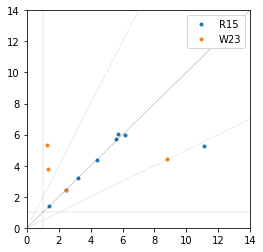

In [229]:
%run ../period_match.py

In [167]:
idx, d2d, d3d

(array([ 42,  42,  58,  68,  58,  68,  58,  58,  42,  58,  16,  28,  58,
        119,  58,  49,  68, 119,  81,  82,  84,  97, 109, 110, 111, 112,
        122, 123, 132, 146, 149, 153, 154, 155, 159, 161, 183, 184, 187,
        189, 191, 192, 193, 194, 195, 196, 198, 199, 202, 212, 219, 222,
        223, 226, 239, 254, 256, 258, 264, 268, 283, 290, 292, 299, 300,
        304, 305, 310, 313, 318, 327, 328, 333, 338, 346, 347, 348, 349,
        349, 354, 359, 362, 376, 385, 391, 393, 396, 421, 400, 403, 409,
        412, 413, 420, 421, 431, 433, 436, 441, 433, 450, 452, 456, 460,
        469, 454, 479, 513, 514, 516, 517, 536, 537, 519, 571, 575, 576,
        581, 583, 591, 561, 596, 575, 600, 526, 592, 617, 561, 575, 644,
        487, 651, 619, 653, 561, 575, 592, 561, 631, 664, 575, 621, 664,
        668, 621, 653, 668, 668, 653, 653, 592, 700]),
 <Angle [1.17329680e-01, 1.03855628e-01, 6.20353708e-02, 6.24426381e-02,
         5.02244000e-02, 4.14046973e-02, 3.48699674e-02, 3.12140352e-

In [169]:
matches = r1_litpertable.table.iloc[idx[sep_constraint]]


ValueError: Cannot create TableLoc object with no indices

In [171]:
r1_litpertable.table[idx[sep_constraint]]

Cat,RAdeg,DEdeg,umagCFHT,e_umagCFHT,gmagCFHT,e_gmagCFHT,rmagCFHT,e_rmagCFHT,imagCFHT,e_imagCFHT,imagSub,e_imagSub,zmagSub,e_zmagSub,l_Jmag,Jmag,e_Jmag,l_Hmag,Hmag,e_Hmag,l_Ksmag,Ksmag,e_Ksmag,l_3.6mag,3.6mag,e_3.6mag,l_4.5mag,4.5mag,e_4.5mag,l_5.8mag,5.8mag,e_5.8mag,l_8.0mag,8.0mag,e_8.0mag,l_24mag,24mag,e_24mag,l_70mag,70mag,e_70mag,logfx,e_logfx,logLx,SpType,r_SpType,Teff,Slope24,Class24,YSOlit,YSOstd,YSOx,YSOaug,CYvar,Var,VarMem,Npts-i1,Mean-i1,Median-i1,Sdev-i1,Max-i1,Min-i1,Range-i1,Amp-i1,Chisq-i1,TScale-i1,Period-i1,M-i1,Ms-i1,Q-i1,Qlt-i1,Npts-i2,Mean-i2,Median-i2,Sdev-i2,Max-i2,Min-i2,Range-i2,Amp-i2,Chisq-i2,Tscale-i2,Period-i2,M-i2,Ms-i2,Q-i2,Qlt-i2,Mean-i1i2,Sdev-i1i2,Period-i1i2,Stetson-i1i2,Cor-i1i1i2,CProb-i1i1i2,Cor-i2i1i2,CProb-i2i1i2
,deg,deg,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,,mag,mag,dex(mW / m2),dex(mW / m2),[10-7W],,,K,,,,,,,,,,,mag,mag,mag,mag,mag,d,mag,,d,d,,,,,,mag,mag,mag,mag,mag,d,mag,,d,d,,,,,mag,mag,d,,,,,
str18,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,float64,float64,str1,float64,float64,str1,float64,float64,str1,float64,float64,str1,float64,float64,str1,float64,float64,str1,float64,float64,str1,float64,float64,str1,float64,float64,float64,float64,float64,str11,str9,int64,float64,str4,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
032836.94+312312.0,52.153925,31.38669,20.25,0.01,17.47,0.01,15.75,0.01,15.12,0.01,15.19,0.01,14.55,0.02,--,11.78,0.02,--,10.82,0.02,--,10.5,0.02,--,10.29,0.01,--,10.25,0.01,--,10.18,0.01,--,10.12,0.01,--,10.11,0.08,--,--,--,-4.88,0.03,29.79,M1,Winston10,3900,-2.76,III,1,1,1,1,0,1,0,17,10.27,10.27,0.03,10.33,10.19,8.63,0.11,6.0,--,--,-0.5,-0.27,--,--,17,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
032844.07+312052.8,52.183651,31.348019,--,--,23.62,0.14,21.24,0.03,18.49,0.01,18.25,0.01,16.97,0.02,--,14.24,0.03,--,13.21,0.03,--,12.63,0.03,--,11.9,0.01,--,11.64,0.01,--,11.31,0.02,--,10.57,0.02,--,8.04,0.03,--,--,--,-6.71,0.29,27.97,M7.5,Winston10,2710,-1.12,II,1,1,0,1,0,0,0,73,11.91,11.91,0.01,11.94,11.88,33.47,0.03,1.47,8.54,--,-0.34,-0.13,0.69,0.67,73,11.58,11.58,0.01,11.62,11.56,33.47,0.03,1.94,4.13,--,-0.11,0.06,0.73,0.6,0.33,0.01,--,0.07,0.66,0.03,-0.48,0.07
032847.63+312406.1,52.198494,31.401701,--,--,23.25,0.12,20.97,0.03,18.68,0.01,18.4,0.01,17.08,0.02,--,14.2,0.04,--,12.6,0.03,--,11.66,0.02,--,10.34,0.01,--,10.05,0.01,--,9.77,0.01,--,9.3,0.01,--,6.55,0.03,--,--,--,-6.16,0.11,28.81,M4,Winston10,3340,-1.01,II,1,1,0,1,1,1,0,73,10.57,10.56,0.15,10.92,10.3,33.47,0.43,215.91,11.39,--,0.27,-0.02,0.86,0.6,73,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
032847.65+312154.5,52.198567,31.365164,--,--,--,--,--,--,23.94,0.07,23.49,0.02,21.39,0.02,--,17.55,0.11,--,16.29,0.1,--,15.24,0.06,--,14.66,0.01,--,14.41,0.02,--,14.18,0.09,--,--,--,>,10.52,--,--,--,--,--,--,--,M9.2,Scholz12,--,-1.8,III,1,0,0,1,0,0,0,73,14.59,14.59,0.02,14.64,14.53,33.47,0.06,1.2,8.25,--,-0.06,-0.2,0.65,-0.31,73,14.39,14.39,0.02,14.44,14.34,33.47,0.07,1.19,4.58,--,-0.33,-0.06,0.1,17.86,0.2,0.03,--,0.01,0.7,0.02,-0.73,0.01
032847.82+311655.1,52.199259,31.281999,21.77,0.05,20.73,0.02,18.85,0.01,16.78,0.01,--,--,--,--,--,12.94,0.02,--,11.74,0.03,--,10.91,0.02,--,9.94,0.01,--,9.39,0.01,--,9.09,0.01,--,8.37,0.01,--,5.59,0.03,--,--,--,-5.87,0.08,28.83,M8,Winston10,2880,-0.87,II,1,1,0,1,0,1,0,73,9.89,9.9,0.08,10.04,9.73,33.47,0.23,38.02,--,--,-0.2,-0.03,--,--,73,9.28,9.29,0.08,9.42,9.13,33.47,0.21,55.37,--,--,-0.25,-0.0,--,--,0.61,0.02,--,0.63,0.24,0.19,-0.02,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

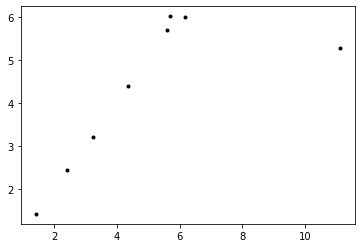

In [174]:
plt.plot(r1_litpertable.period[idx[sep_constraint]], ngc_periods['Period'][sep_constraint], 'k.')